In [16]:
!pip3 install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


## Task 1

When I did this task I ran into some issues dowloading the dataset. After a few minutes I realized that the newest version of xlrd was no longer compatible with .xls files so I decided to change the format of the file to .xlsx to load it. I decided to do since I was struggling to download an old version of xlrd. 

In [3]:
df = pd.read_excel("titanic3.xlsx")

Using describe() was very commmon in our other courses, so I dedicided to give it a try to get a few details of the dataframe (count, mean, min/max, etc)

In [7]:

print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


After getting the results of describe(), I realized that it isn't that helpful so I decided to use another method info(). 

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


This method was more helpful since it helped me with a bit more information about the dataset. We know now that there are 1309 entries, which is a manageable amount of data to practice ML. We also know that there are 14 columns per entry of which 7 are categorical (which we will have to encode later on) and 7 are numerical. It also provides information about the null values present in each column. Since we have 1309 entires then pclass, survived, name, sex, sibsp, parch, and ticket columns are the only ones that have no missing values. We will just keep in this in mind for now and address this in the next task.

Now I will move on to some visualizations. 

[[<Axes: title={'center': 'pclass'}> <Axes: title={'center': 'survived'}>
  <Axes: title={'center': 'age'}>]
 [<Axes: title={'center': 'sibsp'}> <Axes: title={'center': 'parch'}>
  <Axes: title={'center': 'fare'}>]
 [<Axes: title={'center': 'body'}> <Axes: > <Axes: >]]


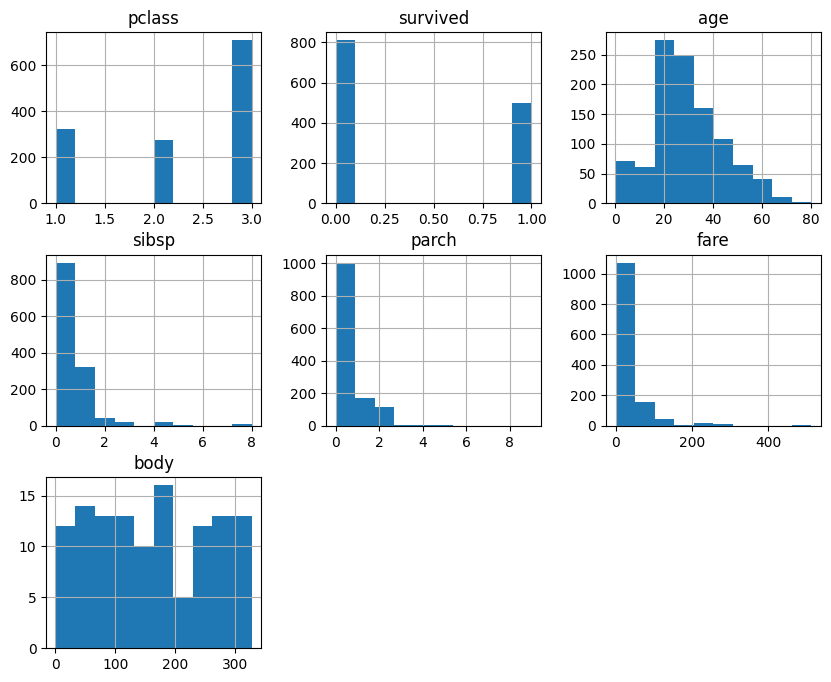

In [15]:
print(df.hist(figsize=(10,8)))

So these histograms gives us a quick insight on each of the columns. For the pclass column it is clear that there much more people from the third class than the first and second classes. The survived column tells us that there are about 800 people that didn't survive, which is much more than those approximately 500 that did. As we previously saw with describe(), passengers' mean age was around 29-30. This means that there were more young adults and kids than there were old adults (right skewed). Majority of the passengers didn't have any companions on-board, some had one companion (probably spouses), and very few had families on-board (few outliers). Again, the enxt histogram tells us that majority of passengers did not have any parents or children on-board. Majority of passengers paid low fares, which we already knew since majority of passengers were traveling in third class, still, there a few who paid much more. Finally, the last histogram is not relevant since this is the column that just tells us the number of the found bodies. 


These histograms porvided useful information about skewness and outliers, which we will have to deal with in later tasks. Nevertheless, the histograms provided information on individual variables. Now I want to get information on relationships, specifically the survival rates across the different variables. I will use a barplot for easy analysis. 

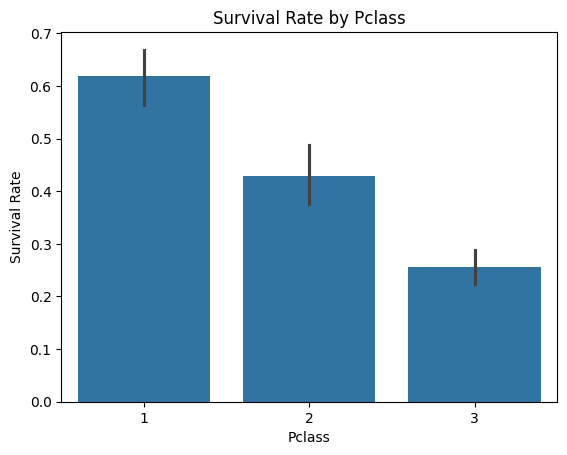

In [18]:
sb.barplot(x="pclass", y="survived", data=df)
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Pclass")
plt.show()

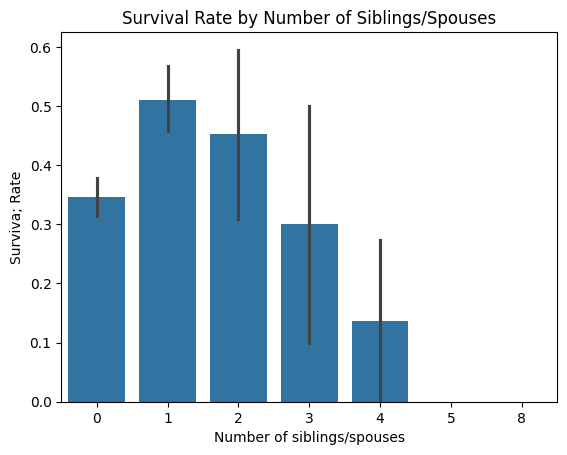

In [25]:
sb.barplot(x="sibsp", y="survived", data=df)
plt.xlabel("Number of siblings/spouses")
plt.ylabel("Surviva; Rate")
plt.title("Survival Rate by Number of Siblings/Spouses")
plt.show()

The most relevant relationship I found was the survival rate by class. As one could've guessed, the survival rate in the first class is much higher than the one in the third class. The barplot shows a clear relationship, the higher the class the higher the survival rate. While the survival rate of those passengers in the first class is about 60%, the survival rate of those passengers in the second class is less then 30%... crazy! Knowing that there are much more passengers from the third class in the dataset, it is intuitive that not many passengers surivived. 

## Task 2

## Task 3

## Task 4

## Task 5

## Task 6

## Task 7

## Task 8